In [17]:
import numpy as np
import matplotlib.pyplot as plt
from fastai import*
from fastai.vision import*
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import pandas as pd
import os, shutil


# Getting Data into desired folders


In [3]:
# paths
labels=pd.read_csv('/content/drive/My Drive/job/train_labels.csv')
image_list=os.listdir('/content/drive/My Drive/job/images')
image_path='/content/drive/My Drive/job/images'
path='/content/drive/My Drive/job/Data'

# Get list of training images
train_images=labels['image'].iloc[:].values

# create a train folder
train_dir=os.path.join(path,'train')
os.mkdir(train_dir)

# create a validation folder
valid_dir=os.path.join(path,'valid')
os.mkdir(valid_dir)

# create test folder
test_dir=os.path.join(path,'test')
os.mkdir(test_dir)

In [4]:
# create train mask and no_mask dirs
train_mask_dir= os.path.join(train_dir, 'mask')
os.mkdir(train_mask_dir)
train_no_mask_dir=os.path.join(train_dir,'no_mask')
os.mkdir(train_no_mask_dir)

# create validation mask and no_mask dirs
valid_mask_dir= os.path.join(valid_dir, 'mask')
os.mkdir(valid_mask_dir)
valid_no_mask_dir=os.path.join(valid_dir,'no_mask')
os.mkdir(valid_no_mask_dir)



In [6]:
# get image files with mask and those without
mask_images= np.array(labels[labels.target==1]['image'])
no_mask_images=np.array(labels[labels.target==0]['image'])

# get list of test images
test=[]
for i in image_list:
  if i not in train_images:
      test.append(i)
        
        
test=np.array(test)  


In [7]:
mask_train=mask_images[:500]
no_mask_train=no_mask_images[:540]
mask_valid=mask_images[500:]
no_mask_valid=no_mask_images[540:]


# copy train images into train folder
for i in mask_train:
    src = os.path.join(image_path, i)
    dst = os.path.join(train_mask_dir, i)
    shutil.copyfile(src, dst)

for i in no_mask_train:
    src = os.path.join(image_path, i)
    dst = os.path.join(train_no_mask_dir, i)
    shutil.copyfile(src, dst)
    
# copy validation images into validation folder     
for i in mask_valid:
    src = os.path.join(image_path, i)
    dst = os.path.join(valid_mask_dir, i)
    shutil.copyfile(src, dst)

for i in no_mask_valid:
    src = os.path.join(image_path, i)
    dst = os.path.join(valid_no_mask_dir, i)
    shutil.copyfile(src, dst)

#images to test folder
for i in test:
    src = os.path.join(image_path, i)
    dst = os.path.join(test_dir, i)
    shutil.copyfile(src, dst)

# fastai proper

In [8]:
# transform, label the data
trfms= get_transforms(do_flip=True, flip_vert=True, max_rotate=40, max_zoom=1.5)
data=ImageDataBunch.from_folder(path, train='train', valid='valid', test='test',ds_tfms=trfms, size=448, bs=16).normalize()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [11]:
data.classes

['mask', 'no_mask']

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

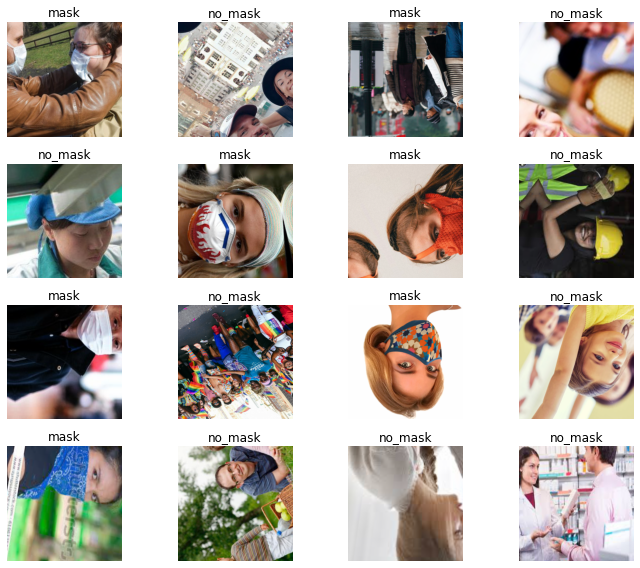

In [12]:
# see images
data.show_batch(n_rows=5, figsize=(10,8))

In [14]:
learner= cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [15]:
learner.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.888587,0.297818,0.891791,00:54
1,0.657398,0.246168,0.899254,00:58


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [16]:
interp= ClassificationInterpretation.from_learner(learner)
interp.most_confused()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

[('no_mask', 'mask', 14), ('mask', 'no_mask', 13)]

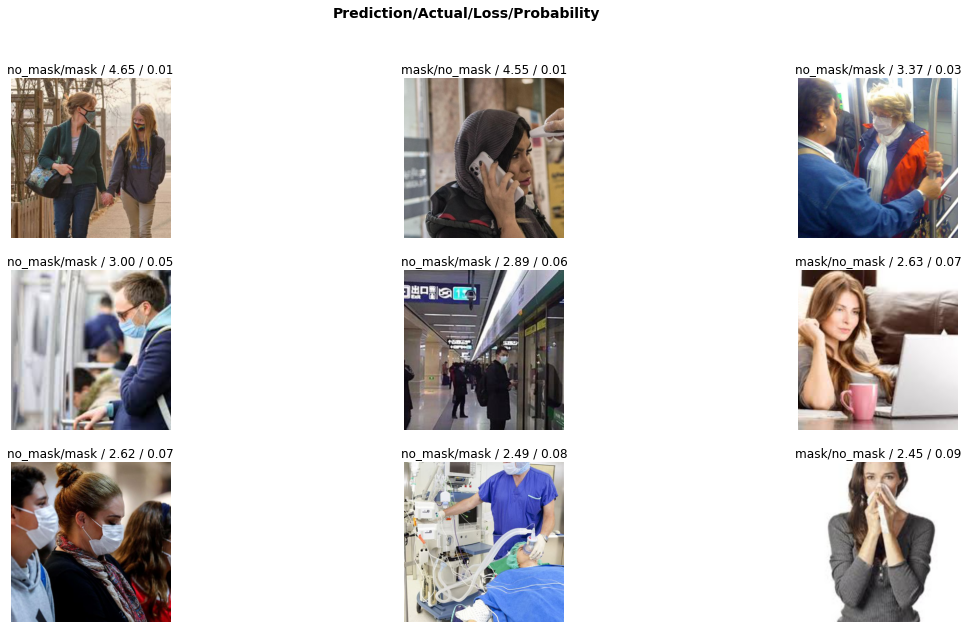

In [18]:
interp.plot_top_losses(9, figsize=(20,10))

In [19]:
learner.lr_find()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


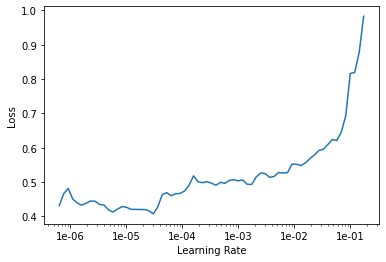

In [20]:
learner.recorder.plot()


In [21]:
learner.unfreeze()

In [22]:
learner.fit_one_cycle(3, max_lr=slice(8e-6,5e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.539622,0.159342,0.929105,00:58
1,0.478534,0.147936,0.932836,00:58
2,0.422876,0.146462,0.947761,00:58


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [24]:
learner.save('model',return_path=True)

PosixPath('/content/drive/My Drive/job/Data/models/model.pth')

In [26]:
learner.export('model.pkl')

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

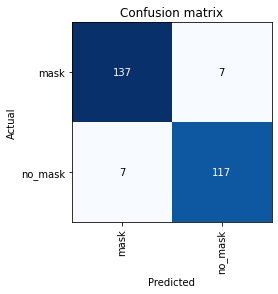

In [30]:
interp= ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

In [33]:
preds,y = learner.get_preds(ds_type=DatasetType.Test)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [43]:
preds_lklyhood= preds[:,0].numpy()

In [46]:
len(preds_lklyhood)

509

In [44]:
submission=pd.DataFrame({'id':test, 'label': preds_lklyhood})

In [45]:
submission.to_csv('testsub.csv', index=False)

In [49]:
submission.head()

,id,label
0,autvannlbggmjsuhqbnnffyhrnyyhp.jpg,0.999955
1,egmlopponygomfuzzhzoextlxzgkmo.jpg,0.258646
2,woazdfgnjkbxcskuamebaxedxhpszi.jpg,0.925498
3,cgnarbagkiqkuvnbgidtpbpzlxxzzc.jpg,0.999942
4,qipkjvcthoccixqxbsdcqgjtzmqvcq.jpg,0.997842
